# COMS DIP Project

In [1]:
#imports
import matplotlib.pyplot as plt
from skimage.filters import threshold_otsu, rank
from skimage.morphology import closing, opening, disk, binary_dilation, dilation, binary_erosion
from skimage.measure import label 
import numpy as np
from skimage import color
import os
from PIL import Image

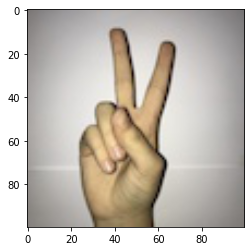

In [16]:
#Referencing Image
img = plt.imread("../Images/input/2/IMG_4808.JPG")
plt.imshow(img, vmin=0, vmax=255, interpolation="bilinear")

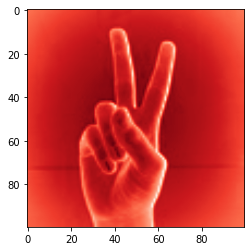

In [17]:
#R-pixel Intensities
plt.close()
plt.imshow(img[:,:,0], cmap='Reds', vmin=0, vmax=255, interpolation="bilinear")

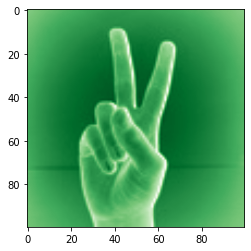

In [18]:
#G-pixel Intensities
plt.close()
plt.imshow(img[:,:,1], cmap='Greens', vmin=0, vmax=255, interpolation="bilinear")

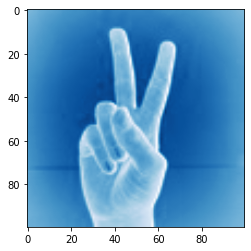

In [19]:
#B-pixel Intensities
plt.close()
plt.imshow(img[:,:,2], cmap='Blues', vmin=0, vmax=255, interpolation="bilinear")

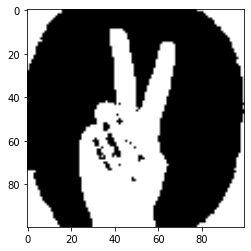

In [20]:
#Make background black and hand white (Segment image)
plt.close()
def Segment(in_image):
    binary = np.zeros((in_image.shape[0],in_image.shape[1]), dtype=bool)
    rows = 1
    cols = 1
    r_division = int(in_image.shape[0]/rows)
    c_division = int(in_image.shape[1]/cols)
    for r in range(rows):
        for c in range(cols):
            thresh = threshold_otsu(in_image[r*r_division:(r+1)*r_division,c*c_division:(c+1)*c_division])
            binary[r*r_division:(r+1)*r_division,c*c_division:(c+1)*c_division] = thresh > in_image[r*r_division:(r+1)*r_division,c*c_division:(c+1)*c_division]
    return binary
binary = Segment(img[:,:,2])
plt.imshow(binary, cmap='gray', vmin=0, vmax=1, interpolation="bilinear")

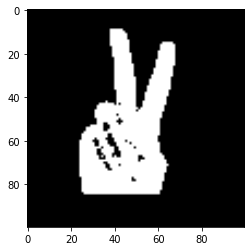

In [21]:
#Remove Vignette
plt.close()
def Vignette(in_image):
    in_image[:,in_image.shape[1]-15:] = False
    in_image[in_image.shape[0]-15:,:] = False
    in_image[:,:15] = False
    in_image[:5,:] = False
    return in_image
vig = Vignette(binary)
plt.imshow(vig, cmap='gray', vmin=0, vmax=1, interpolation="bilinear")

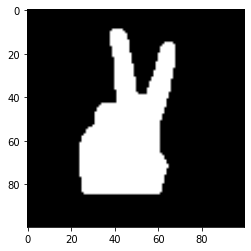

In [22]:
#Colour inner hand white
plt.close()
def Fill(in_image):
    filler = closing(in_image, disk(2.8))
    return filler
filler = Fill(vig)
plt.imshow(filler, cmap='gray', vmin=0, vmax=1, interpolation="bilinear")

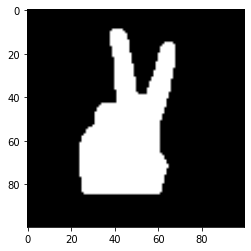

In [23]:
#Remove slight background noise
plt.close()
def Obstacles(in_image):
    obs = opening(in_image, disk(1.5))
    return obs
obs = Obstacles(filler)
plt.imshow(obs, cmap='gray', vmin=0, vmax=1, interpolation="bilinear")

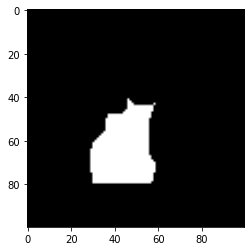

In [37]:
#Erode away fingers
plt.close()
def Palm(in_image):
    palm = binary_erosion(in_image, disk(5.6))
    return palm
palm = Palm(obs)
plt.imshow(palm, cmap='gray', vmin=0, vmax=1, interpolation="bilinear")

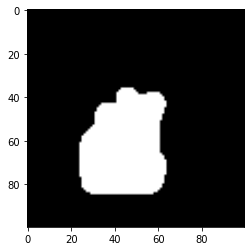

In [38]:
#Make ball of hand normal size again
plt.close()
def Fist(in_image):
    fist = binary_dilation(in_image, disk(5.6))
    return fist
fist = Fist(palm)
plt.imshow(fist, cmap='gray', vmin=0, vmax=1, interpolation="bilinear")

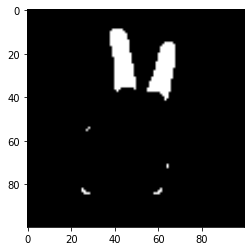

In [39]:
#Normal hand minus ball of hand
plt.close()
def Finger(hand, fist):
    finger = hand & (~fist)
    return finger
finger = Finger(obs, fist)
plt.imshow(finger, cmap='gray', vmin=0, vmax=1, interpolation="bilinear")

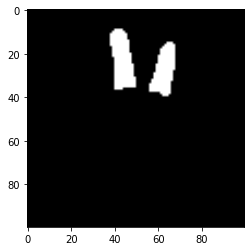

In [40]:
#Get rid of noise
plt.close()
def Noise(in_image):
    noise = opening(in_image, disk(1.7))
    return noise
noise = Noise(finger)
plt.imshow(noise, cmap='gray', vmin=0, vmax=1, interpolation="bilinear")

In [41]:
#Count connections
plt.close()
def Connections(in_image):
    labels = label(in_image)
    return np.max(labels)
connections = Connections(noise)
print(connections)

2


In [43]:
correct = np.zeros(6)
wrong = np.zeros(6)
for int_folder in range(0,6):
    str_folder = str(int_folder)
    for filename in os.listdir("../Images/input/"+str_folder):
        img = plt.imread("../Images/input/"+str_folder+"/"+filename)
        binary = Segment(img[:,:,2])
        vig = Vignette(binary)
        filler = Fill(vig)
        obs = Obstacles(filler)
        palm = Palm(obs)
        fist = Fist(palm)
        finger = Finger(obs, fist)
        noise = Noise(finger)
        connections = Connections(noise)
        if (connections == int_folder):
            correct[int_folder] = correct[int_folder]+1
        else:
            wrong[int_folder] = wrong[int_folder]+1
        image = Image.fromarray(noise)
        image.save("../Images/output/"+str_folder+"/"+filename)
print("Percentage Correct for 0 fingers:", correct[0]/(correct[0]+wrong[0]))
print("Percentage Correct for 1 fingers:", correct[1]/(correct[1]+wrong[1]))
print("Percentage Correct for 2 fingers:", correct[2]/(correct[2]+wrong[2]))
print("Percentage Correct for 3 fingers:", correct[3]/(correct[3]+wrong[3]))
print("Percentage Correct for 4 fingers:", correct[4]/(correct[4]+wrong[4]))
print("Percentage Correct for 5 fingers:", correct[5]/(correct[5]+wrong[5]))
total_correct = correct[0]+correct[1]+correct[2]+correct[3]+correct[4]+correct[5]
total_wrong = wrong[0]+wrong[1]+wrong[2]+wrong[3]+wrong[4]+wrong[5]
valid_correct = total_correct - correct[0]
valid_wrong = total_wrong - wrong[0]
print("Total Percentage Correct:", total_correct/(total_correct+total_wrong))
print("Total Percentage Correct Not Including 0:", valid_correct/(valid_correct+valid_wrong))

Percentage Correct for 0 fingers: 0.08780487804878048
Percentage Correct for 1 fingers: 0.616504854368932
Percentage Correct for 2 fingers: 0.7621359223300971
Percentage Correct for 3 fingers: 0.7524271844660194
Percentage Correct for 4 fingers: 0.4492753623188406
Percentage Correct for 5 fingers: 0.5314009661835749
Total Percentage Correct: 0.5335489086499596
Total Percentage Correct Not Including 0: 0.622093023255814
